## Advantage is rolling two d20s and taking the highest roll

In [290]:
import random

def roll_advantage():
    dieOne = random.randint(1,20)
    dieTwo = random.randint(1,20)

    advantage = max(dieOne, dieTwo)

    return advantage


In [291]:
roll_advantage()

20

### The average roll is important! Let's calculate it using maths and then simulate to make sure.

In [292]:
def calculate_average(number_of_sides):
    #scary probability math
    return (1 / (6 * number_of_sides)) * (number_of_sides + 1) * (4 * number_of_sides - 1)

In [293]:
calculate_average(20)

13.825

In [294]:
def simulate(tries):
    sum = 0
    for i in range(tries):
        sum += roll_advantage()
    average = sum / tries
    return average


In [295]:
#roll a hundred thousand advantages
simulate(100000)

13.83556

### So that means to hit a 10 or higher you have the equivalent of a +3.825 right?

In [311]:
def roll_plus(modifier):
    def roll_plus():
        return random.randint(1,20) + modifier
    return roll_plus

In [312]:
def simulate_hitting(target, tactic, tries):
    hits = 0
    for i in range(tries):
        if (tactic() >= target):
            hits += 1
    return hits/tries

In [298]:
simulate_hitting(10, roll_advantage, 10000)

0.7993

In [318]:
simulate_hitting(10, roll_plus(3.285), 10000)

0.6936

## **WRONG!** Not at all. 
### Easy mistake to make. The average is less important because the goal in D&D is to succeed at a check, not to have your average roll be high.
### 
### Lets see how these simulations look graphed together

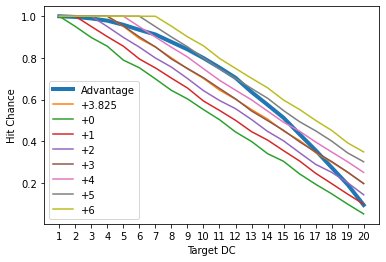

In [324]:
import matplotlib.pyplot as pyplot
import numpy

advantage_hits = numpy.array([ simulate_hitting(i, roll_advantage, 10000) for i in range(1, 21) ])
plus_hits = numpy.array([ simulate_hitting(i, roll_plus(3.825), 10000) for i in range(1, 21) ])
dcs = numpy.array(range(1,21))

pyplot.plot(dcs, advantage_hits, label="Advantage", linewidth=4)
pyplot.plot(dcs, plus_hits, label="+3.825")
for i in range(0,7):
    hits = numpy.array([ simulate_hitting(j, roll_plus(i), 10000) for j in range(1, 21) ])
    pyplot.plot(dcs, hits, label=f"+{i}")
pyplot.xticks(dcs)
pyplot.xlabel("Target DC")
pyplot.ylabel("Hit Chance")
pyplot.legend()

pyplot.show()


### Advantage is more like a +5 if you have to roll a 10, 11 or 12 (a lot of D&D rolls are around there)
### But more like a +1 if you need a 20